In [353]:
import pandas as pd 

#load dataset:
df = pd.read_csv('Housing.csv')

#basic info:
print("Dataset Shape:", df.shape)
print("Column names:",df.columns)
print("First 5 rows:",df.head())

Dataset Shape: (545, 13)
Column names: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
First 5 rows:       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2  

In [354]:
numeric_features = df.select_dtypes(include=['int64','float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

print("Numeric Features:",numeric_features)
print("Categorical Features:",categorical_features)

Numeric Features: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
Categorical Features: Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [355]:
for col in categorical_features:
    print(f"\nUnique values in {col}: {df[col].unique()}")



Unique values in mainroad: ['yes' 'no']

Unique values in guestroom: ['no' 'yes']

Unique values in basement: ['no' 'yes']

Unique values in hotwaterheating: ['no' 'yes']

Unique values in airconditioning: ['yes' 'no']

Unique values in prefarea: ['yes' 'no']

Unique values in furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [356]:
#Exploratory Data Analysis(EDA):
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


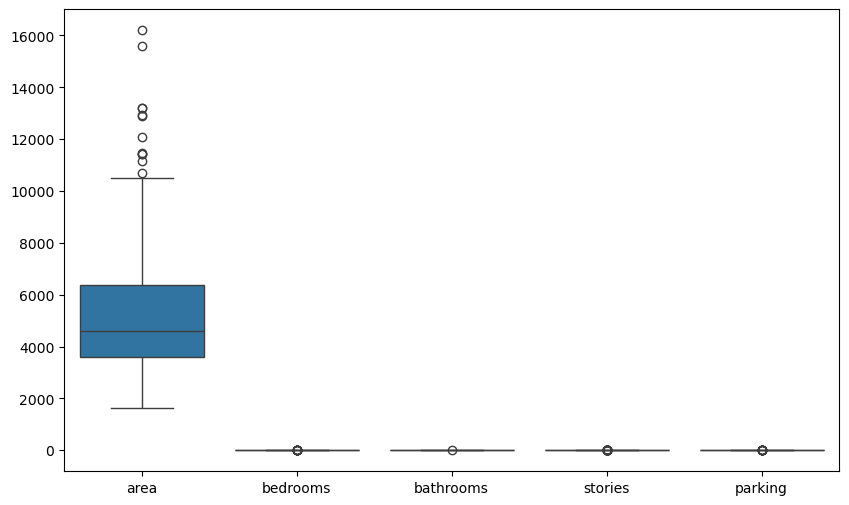

In [357]:
#Detect outliers:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for numerical features
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
plt.show()


In [358]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [359]:
#remove duplicates:
df.drop_duplicates(inplace=True)

In [360]:
df.shape

(545, 13)

In [361]:
#Label Encoding:
binary_mapping = {'yes':1,'no':0}
#apply mappings to relevent columns:
binary_columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[binary_columns] = df[binary_columns].replace(binary_mapping)

C:\Users\siddi\AppData\Local\Temp\ipykernel_17236\3670243735.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace(binary_mapping)


In [362]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [363]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [364]:
# Convert boolean values in the dataframe from True/False to 1/0
df = df.astype({col: 'int' for col in df.columns if df[col].dtype == 'bool'})

# Check the updated dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [365]:
#creating new Features:
# Price per square foot
df['price_per_sqft'] = df['price']/df['area']

# Total rooms (considering bedrooms, bathrooms, and stories)
df['total_rooms'] = df['bedrooms']+df['bathrooms']+df['stories']
# Total floors (stories)
df['total_floors'] = df['stories']

# Check if parking is available
df['parking'] = df['parking'].apply(lambda x: 1 if x > 0 else 0)  # Binary: 1 if parking > 0, else 0

df['price_per_bedroom'] = df['price']/df['bedrooms']

df['area_per_story'] = df['area']/df['stories']

In [366]:
#checking correlation after adding new features:
new_features = ['price_per_sqft','total_rooms','total_floors','price_per_bedroom','area_per_story']
print(df[new_features].corrwith(df['price']))

price_per_sqft       0.392921
total_rooms          0.551711
total_floors         0.420712
price_per_bedroom    0.768975
area_per_story       0.101954
dtype: float64


In [367]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_per_sqft,total_rooms,total_floors,price_per_bedroom,area_per_story
299,4200000,7000,3,1,1,1,0,0,0,0,1,0,0,0,600.000000,5,1,1.400000e+06,7000.0
342,3850000,7152,3,1,2,1,0,0,0,1,0,0,0,0,538.310962,6,2,1.283333e+06,3576.0
188,5075000,5720,2,1,2,1,0,0,0,1,0,1,0,1,887.237762,5,2,2.537500e+06,2860.0
121,5950000,7231,3,1,2,1,1,1,0,1,0,1,1,0,822.846079,6,2,1.983333e+06,3615.5
286,4235000,2787,3,1,1,1,0,1,0,0,0,1,0,0,1519.555077,5,1,1.411667e+06,2787.0


In [368]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_per_sqft,total_rooms,total_floors,price_per_bedroom,area_per_story
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.451376,0.234862,0.416514,0.326606,993.326978,6.056881,1.805505,1.646203e+06,3491.139602
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.498087,0.424302,0.493434,0.469402,346.537025,1.623153,0.867492,5.812692e+05,2246.131370
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,270.395550,3.000000,1.000000,3.920000e+05,715.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,745.370370,5.000000,1.000000,1.213333e+06,1833.333333
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,952.380952,6.000000,2.000000,1.563333e+06,2840.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1184.615385,7.000000,2.000000,1.983333e+06,4340.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2640.000000,12.000000,4.000000,4.083333e+06,15600.000000


In [369]:
# Calculate correlation matrix and correlation with 'price'
corr_matrix = df.corr()
print(corr_matrix['price'])

price                              1.000000
area                               0.535997
bedrooms                           0.366494
bathrooms                          0.517545
stories                            0.420712
mainroad                           0.296898
guestroom                          0.255517
basement                           0.187057
hotwaterheating                    0.093073
airconditioning                    0.452954
parking                            0.372096
prefarea                           0.329777
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
price_per_sqft                     0.392921
total_rooms                        0.551711
total_floors                       0.420712
price_per_bedroom                  0.768975
area_per_story                     0.101954
Name: price, dtype: float64


In [370]:
df.shape

(545, 19)

In [371]:
# Set correlation threshold
correlation_threshold = 0.2

# Get correlation with target ('price')
correlation_with_target = df.corr()['price']

# Filter out features with low correlation with 'price'
features_to_drop = correlation_with_target[abs(correlation_with_target) < correlation_threshold].index

# Remove unimportant features from the dataset
df_filtered = df.drop(columns=features_to_drop)

# Show remaining columns after feature selection
print("Remaining Features after Elimination:")
print(df_filtered.columns)


Remaining Features after Elimination:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_unfurnished', 'price_per_sqft', 'total_rooms',
       'total_floors', 'price_per_bedroom'],
      dtype='object')


In [372]:
df_filtered

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,prefarea,furnishingstatus_unfurnished,price_per_sqft,total_rooms,total_floors,price_per_bedroom
0,13300000,7420,4,2,3,1,0,1,1,1,0,1792.452830,9,3,3.325000e+06
1,12250000,8960,4,4,4,1,0,1,1,0,0,1367.187500,12,4,3.062500e+06
2,12250000,9960,3,2,2,1,0,0,1,1,0,1229.919679,7,2,4.083333e+06
3,12215000,7500,4,2,2,1,0,1,1,1,0,1628.666667,8,2,3.053750e+06
4,11410000,7420,4,1,2,1,1,1,1,0,0,1537.735849,7,2,2.852500e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,0,1,0,1,606.666667,4,1,9.100000e+05
541,1767150,2400,3,1,1,0,0,0,0,0,0,736.312500,5,1,5.890500e+05
542,1750000,3620,2,1,1,1,0,0,0,0,1,483.425414,4,1,8.750000e+05
543,1750000,2910,3,1,1,0,0,0,0,0,0,601.374570,5,1,5.833333e+05


In [373]:
# Remove the original features that are no longer needed
features_to_remove = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Drop those columns from the DataFrame
df_cleaned = df_filtered.drop(columns=features_to_remove)

# Show the updated DataFrame with only the required features
print("Remaining Features after Removal:")
print(df_cleaned.columns)

Remaining Features after Removal:
Index(['price', 'mainroad', 'guestroom', 'airconditioning', 'prefarea',
       'furnishingstatus_unfurnished', 'price_per_sqft', 'total_rooms',
       'total_floors', 'price_per_bedroom'],
      dtype='object')


In [374]:
df = df_cleaned
print(df_cleaned.shape)
print(df.describe())

(545, 10)
              price    mainroad   guestroom  airconditioning    prefarea  \
count  5.450000e+02  545.000000  545.000000       545.000000  545.000000   
mean   4.766729e+06    0.858716    0.177982         0.315596    0.234862   
std    1.870440e+06    0.348635    0.382849         0.465180    0.424302   
min    1.750000e+06    0.000000    0.000000         0.000000    0.000000   
25%    3.430000e+06    1.000000    0.000000         0.000000    0.000000   
50%    4.340000e+06    1.000000    0.000000         0.000000    0.000000   
75%    5.740000e+06    1.000000    0.000000         1.000000    0.000000   
max    1.330000e+07    1.000000    1.000000         1.000000    1.000000   

       furnishingstatus_unfurnished  price_per_sqft  total_rooms  \
count                    545.000000      545.000000   545.000000   
mean                       0.326606      993.326978     6.056881   
std                        0.469402      346.537025     1.623153   
min                        0.0000

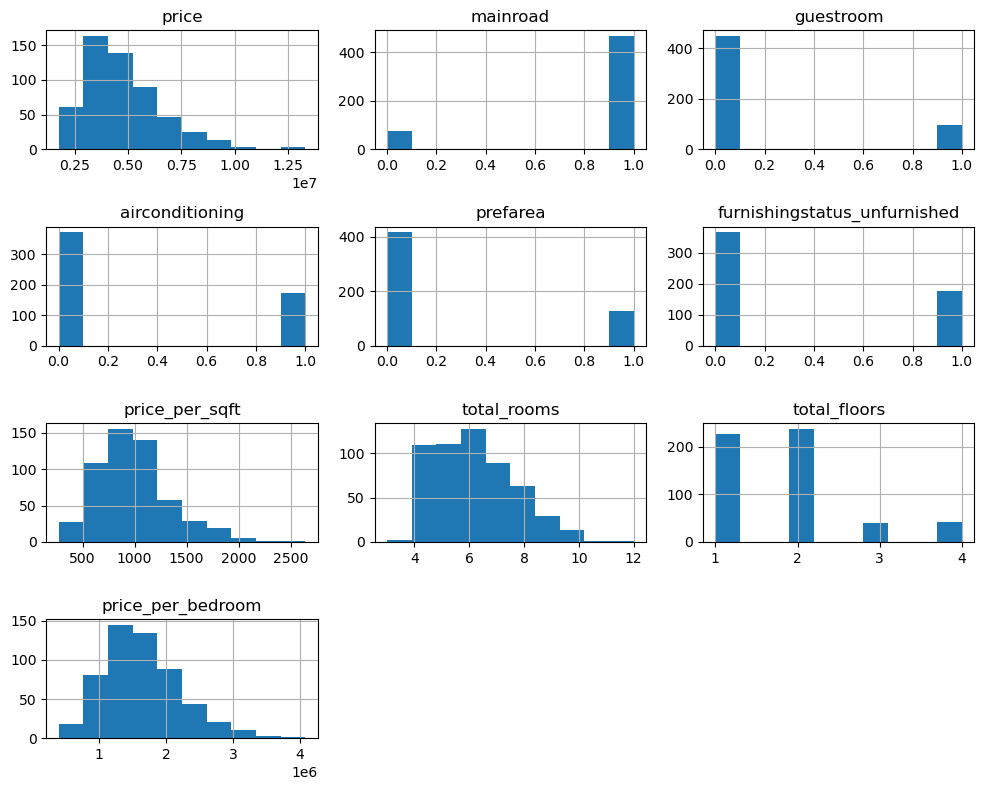

In [375]:
# Plotting histograms for all numerical columns
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

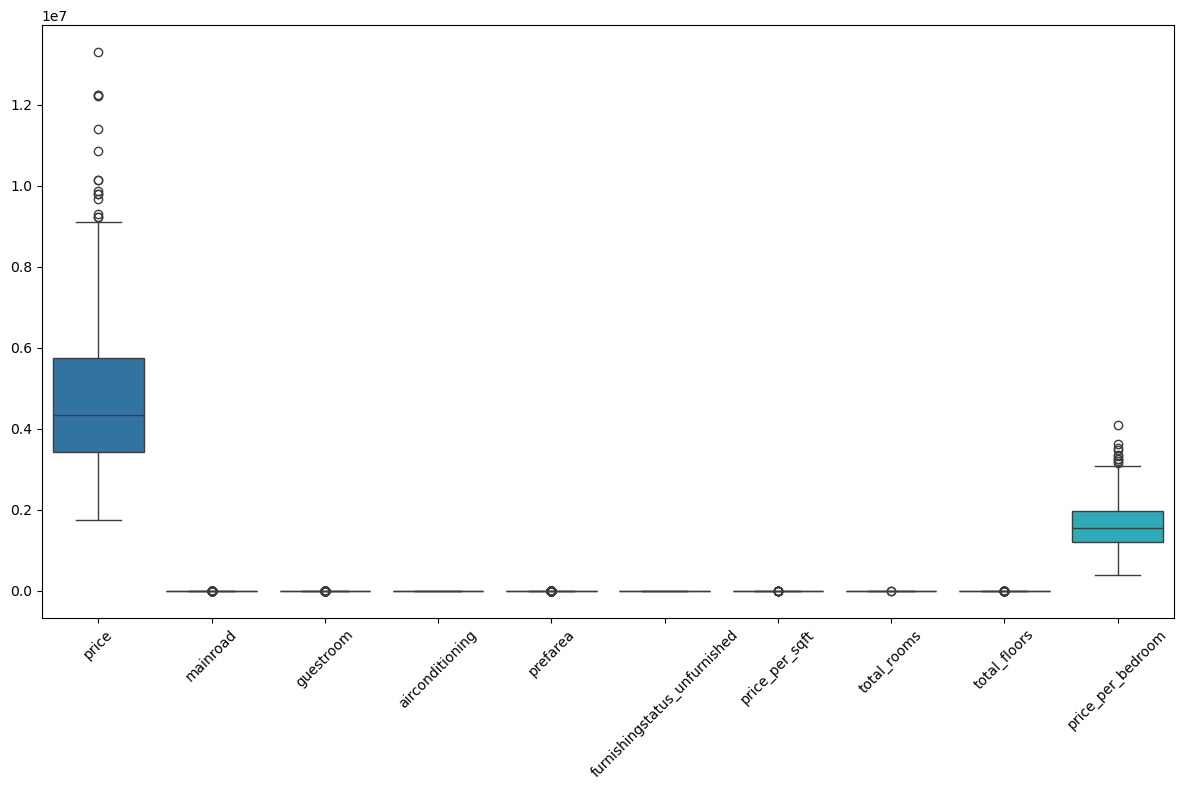

In [376]:
import seaborn as sns

# Boxplot for each numerical feature to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


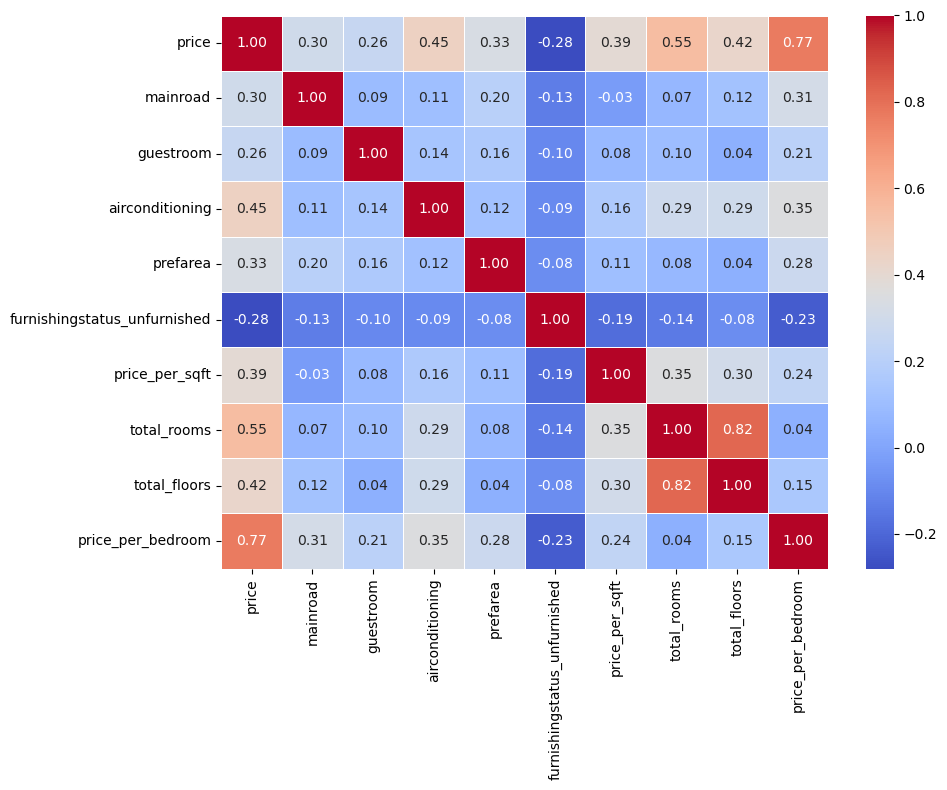

In [377]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.tight_layout()
plt.show()


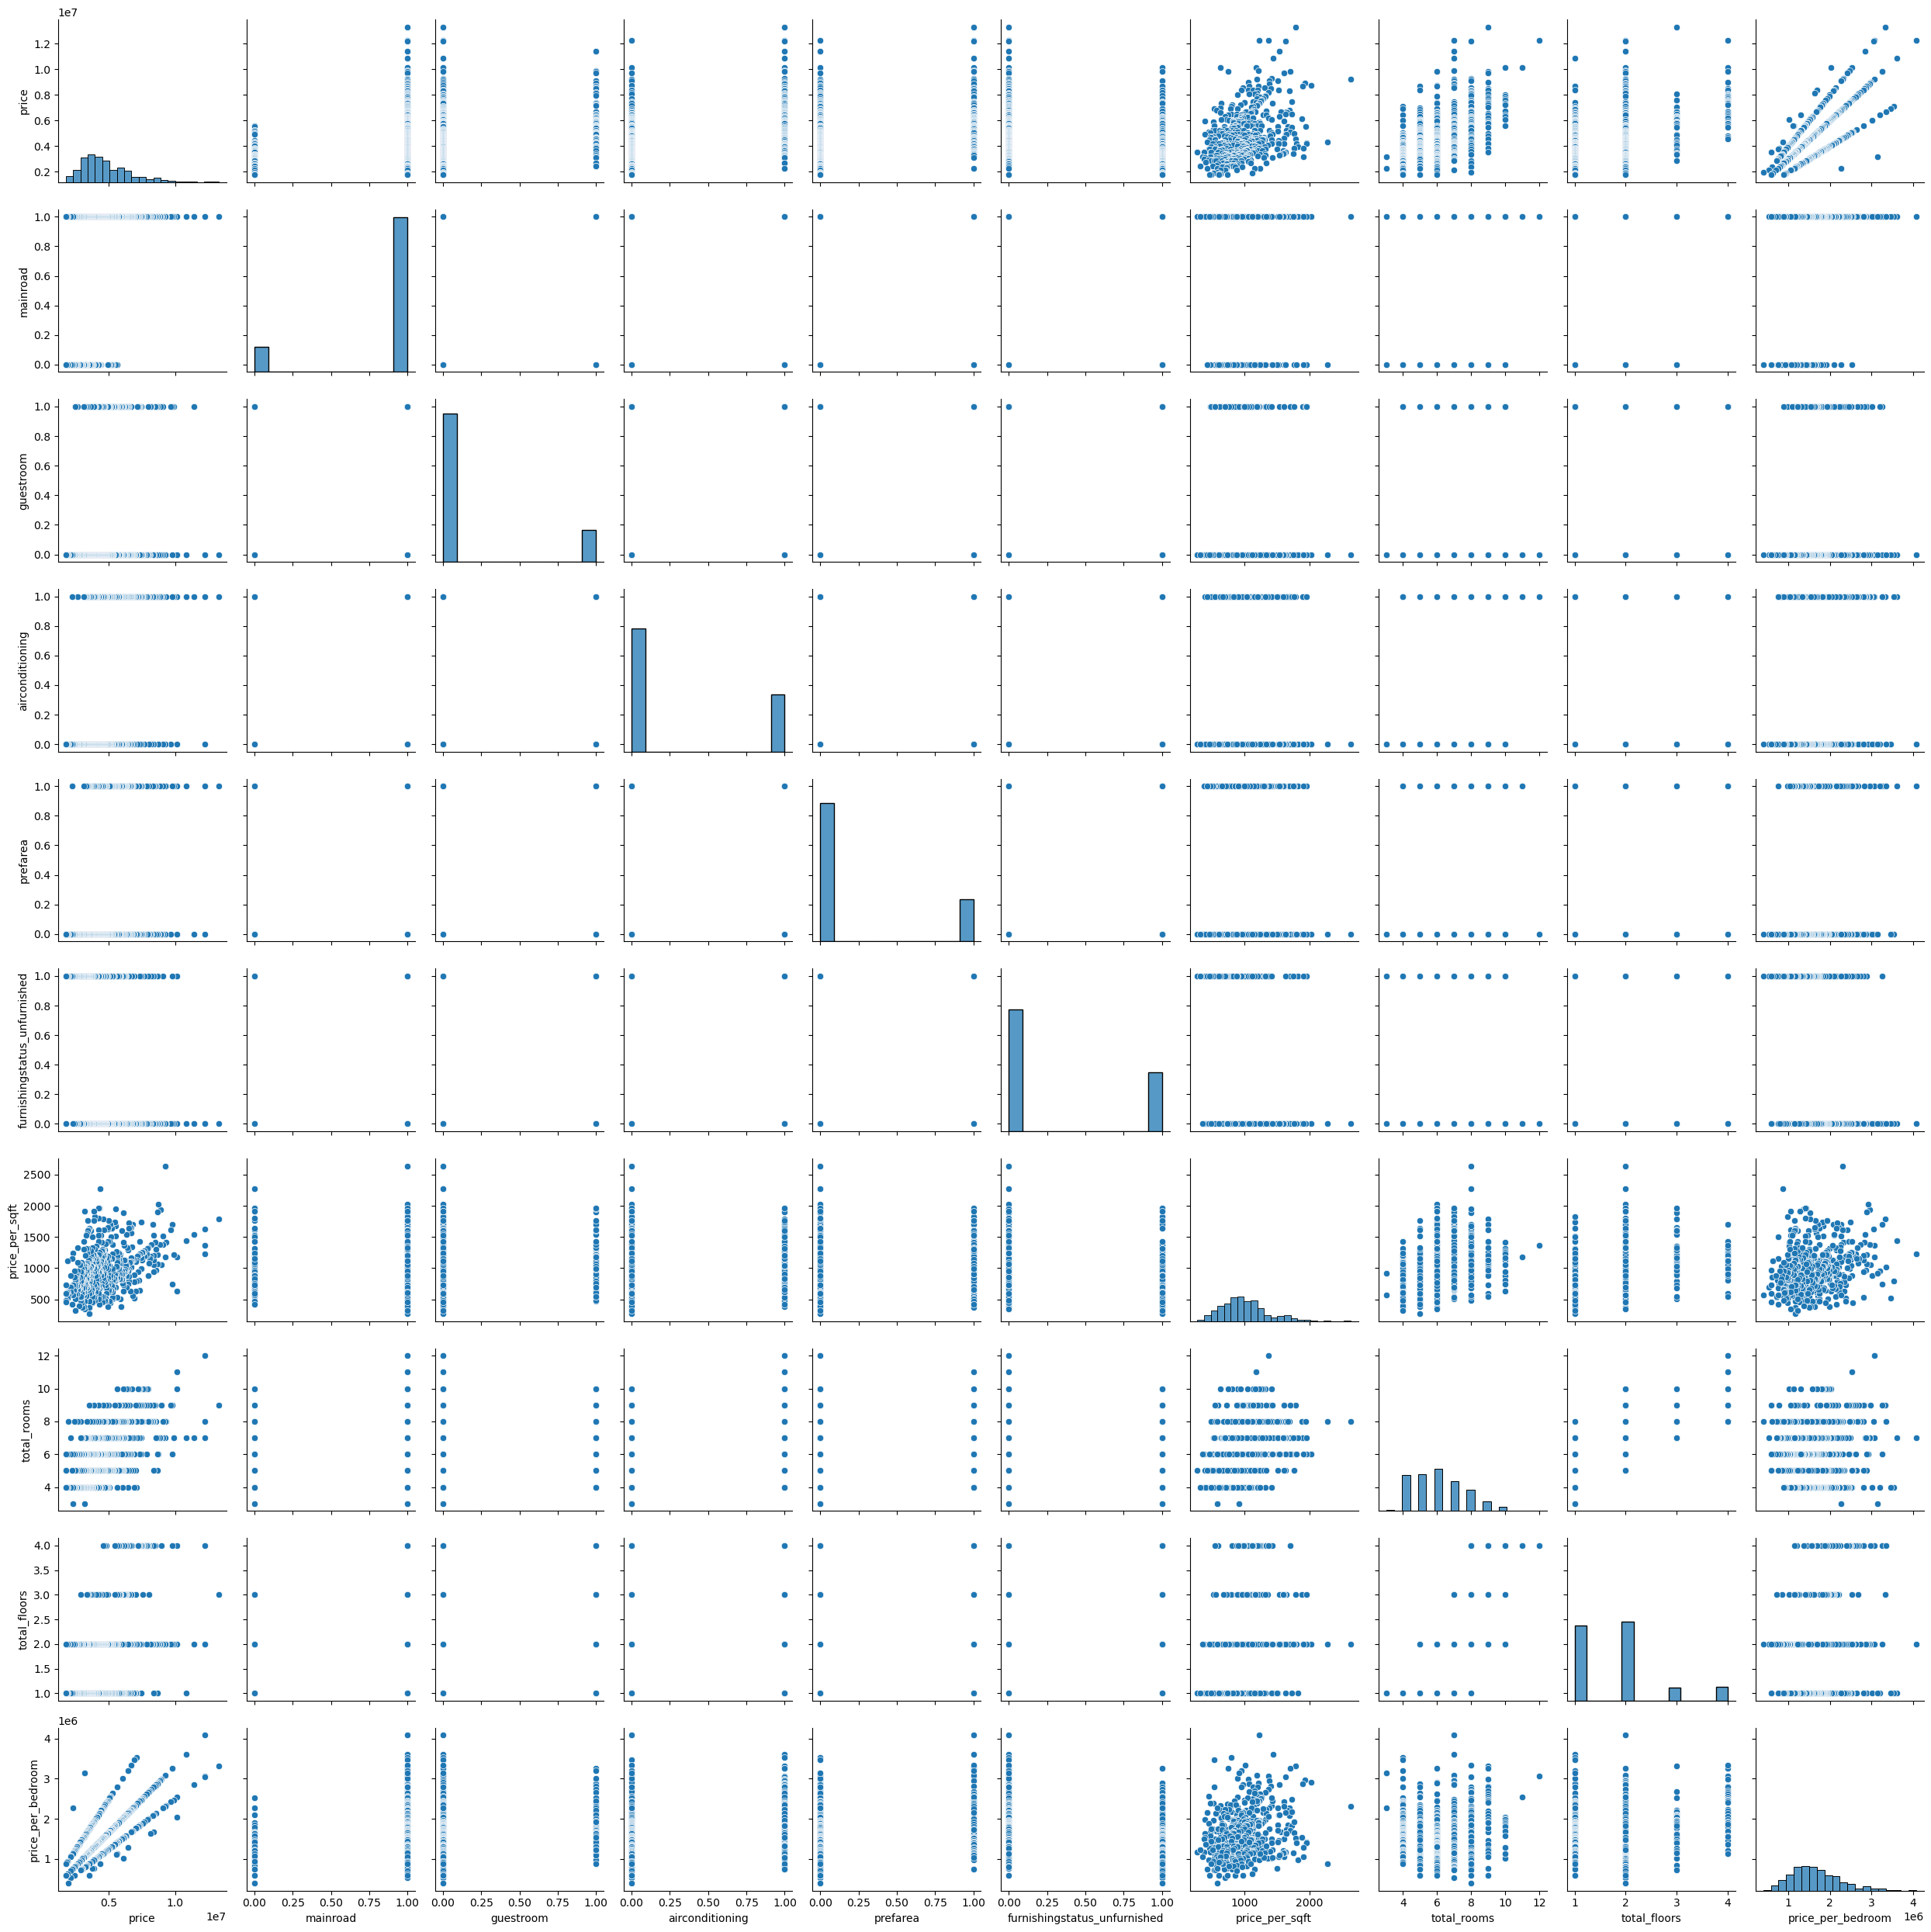

In [378]:
# Pairplot to show interactions between numerical features
sns.pairplot(df)
plt.tight_layout()
plt.show()


In [379]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         545 non-null    int64  
 1   mainroad                      545 non-null    int64  
 2   guestroom                     545 non-null    int64  
 3   airconditioning               545 non-null    int64  
 4   prefarea                      545 non-null    int64  
 5   furnishingstatus_unfurnished  545 non-null    int32  
 6   price_per_sqft                545 non-null    float64
 7   total_rooms                   545 non-null    int64  
 8   total_floors                  545 non-null    int64  
 9   price_per_bedroom             545 non-null    float64
dtypes: float64(2), int32(1), int64(7)
memory usage: 40.6 KB


In [380]:
df.sample(5)

,price,mainroad,guestroom,airconditioning,prefarea,furnishingstatus_unfurnished,price_per_sqft,total_rooms,total_floors,price_per_bedroom
80,6629000,1,0,0,1,0,1104.833333,6,2,2.209667e+06
355,3773000,1,0,0,0,0,457.333333,5,1,1.257667e+06
16,9100000,1,1,1,1,1,1378.787879,8,2,2.275000e+06
130,5866000,1,1,0,0,1,1222.083333,5,1,1.955333e+06
196,4970000,1,1,0,0,0,646.630237,5,1,1.656667e+06


In [381]:
# Splitting the dataset
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

In [382]:
# Step 3: Feature scaling for numeric features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Standardize numeric features
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [383]:
# Step 4: Hyperparameter tuning and regression model selection
# Define models and hyperparameters
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [384]:
# Hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [385]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
# Dictionary to store results
results = {}

for model_name, model in models.items():
    if model_name == 'Random Forest':
        # Perform GridSearchCV for Random Forest
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_rf, 
                                   scoring='r2', cv=5, n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    else:
        # Use default Linear Regression without hyperparameter tuning
        best_model = model
        best_model.fit(X_train, y_train)
    
    # Evaluate model on test data
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {'MSE': mse, 'R2': r2}
    print(f"{model_name} - Mean Squared Error: {mse}, R2 Score: {r2}")


Linear Regression - Mean Squared Error: 415361554033.9614, R2 Score: 0.9178245560375579
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - Mean Squared Error: 523638480215.9938, R2 Score: 0.8964029670785336


In [386]:
# Step 5: Display the best model based on R2 Score
best_model_name = max(results, key=lambda k: results[k]['R2'])
print(f"The best model is: {best_model_name} with R2 Score of {results[best_model_name]['R2']}")


The best model is: Linear Regression with R2 Score of 0.9178245560375579
